In [27]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load dataset
df = pd.read_csv("Telco_Customer_Churn_Dataset  (3).csv")

In [29]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [30]:
df.head(5)       # First 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df.info()         # Columns & datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
df.describe()    # Summary of numeric data

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [42]:
df.columns # its a Check actual column names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
df_sorted = df.sort_values(by="tenure", ascending=True)
print(df_sorted.head())  

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
1340           No  No phone service             DSL                  Yes  ...   
936           Yes                No             DSL                  Yes  ...   
6670          Yes               Yes             DSL                   No  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
1340                 

In [35]:
# Filter churned customers
df_churned = df[df['Churn'] == 'Yes']   # or 1 if it's numeric
print(df_churned.head())

    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2   3668-QPYBK    Male              0      No         No       2          Yes   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
2             No             DSL            Yes  ...               No   
4             No     Fiber optic             No  ...               No   
5            Yes     Fiber optic             No  ...              Yes   
8            Yes     Fiber optic             No  ...              Yes   
13           Yes     Fiber optic             No  ...              Yes   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBillin

In [36]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Text(0, 0.5, 'Number of Customers')

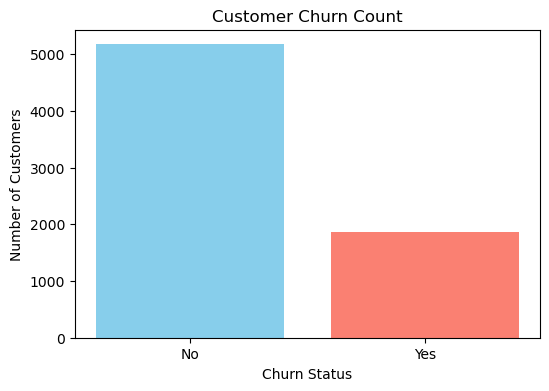

In [37]:
# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue','salmon'])
plt.title("Customer Churn Count")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")

C:\Users\nks07\AppData\Local\Temp\ipykernel_19876\2540659638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


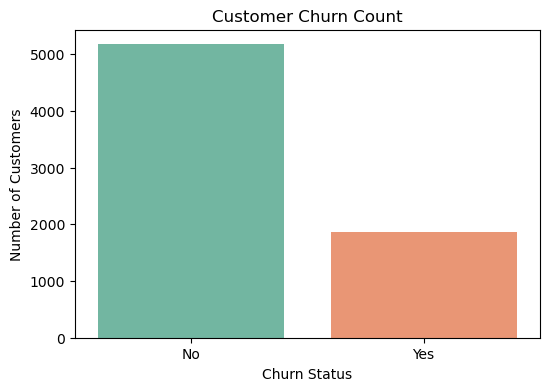

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Customer Churn Count")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.show()


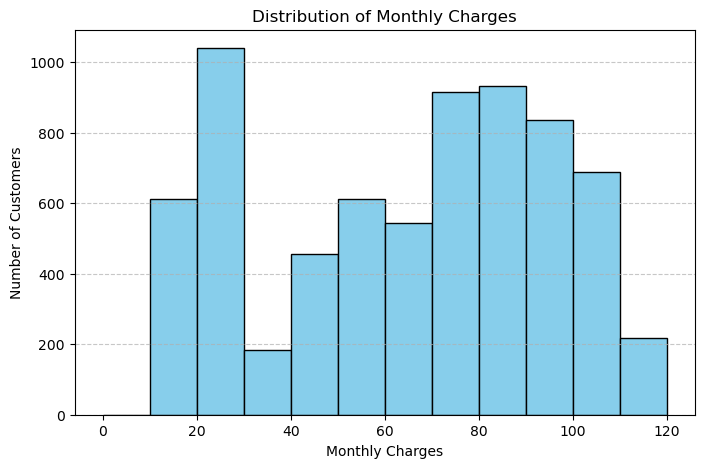

In [39]:
# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['MonthlyCharges'], bins=range(0, 130, 10), color='skyblue', edgecolor='black')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

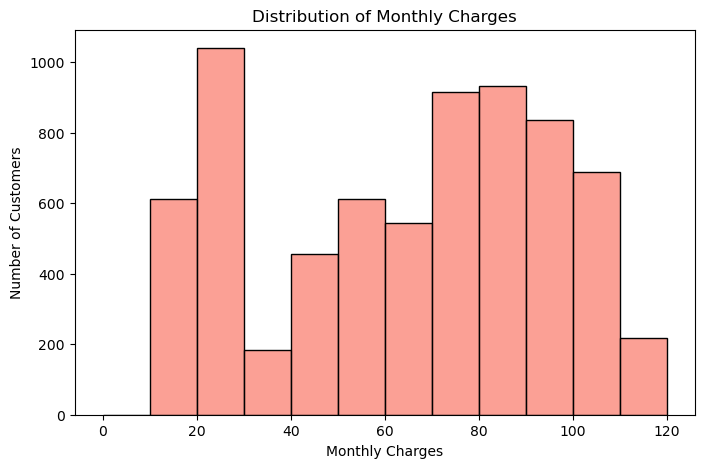

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(df['MonthlyCharges'], bins=range(0,130,10), color='salmon', edgecolor='black')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.show()

In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
# Group by Gender 
df.groupby(['gender', 'Churn']).size().unstack(fill_value=0)

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


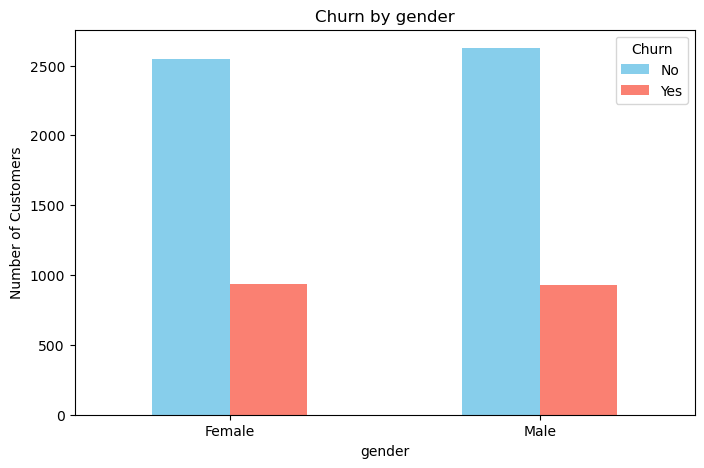

In [49]:
# Plot
pivot_data.plot(kind='bar', figsize=(8,5), color=['skyblue','salmon'])
plt.title("Churn by gender")
plt.xlabel("gender")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.show()

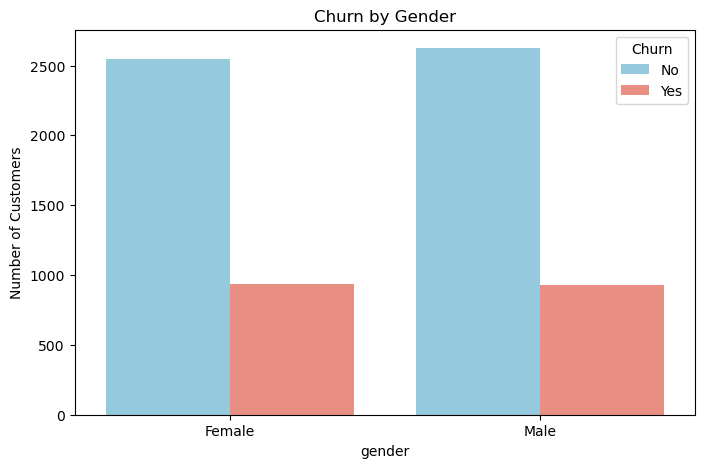

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender', hue='Churn', data=df, palette=['skyblue','salmon'])
plt.title("Churn by Gender")
plt.xlabel("gender")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()

In [51]:
# Create bins
df['tenureGroup'] = pd.cut(df['tenure'], bins=[0,12,24,36,48,60,72], labels=['0-12','13-24','25-36','37-48','49-60','61-72'])

In [52]:
df['ChargeGroup'] = pd.cut(df['MonthlyCharges'], bins=[0,20,40,60,80,100,120], labels=['0-20','21-40','41-60','61-80','81-100','101-120'])

In [54]:
# Create pivot table for churned customers
pivot_table = pd.crosstab(df['tenureGroup'], df['ChargeGroup'])

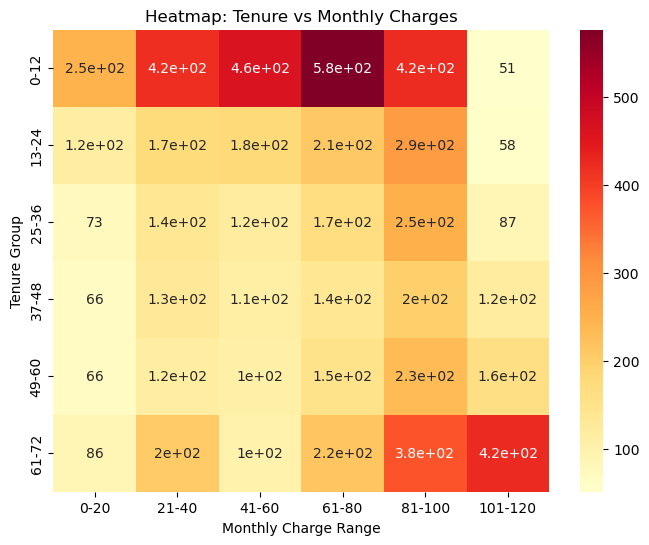

In [55]:
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap="YlOrRd")
plt.title("Heatmap: Tenure vs Monthly Charges")
plt.xlabel("Monthly Charge Range")
plt.ylabel("Tenure Group")
plt.show()